# Постановка задачи. 

Рассмотрим полет ракеты, выпущенной с начальной скоростью $v$ под углом $\theta$  к горизонту, при следующих предположениях: 
- сила сопротивления воздуха пропорциональна квадрату скорости ракеты; 
- дальность полета ракеты не превышает 100 км;  
- боковой ветер отсутствует.

При сделанных допущениях можно считать, что земля плоская и вся траектория ракеты лежит в одной плоскости $xOy$. Уравнения движения центра масс ракеты в проекциях на оси координат запишутся в виде 
$$x'' = \frac{(T- \frac{C \rho Sv^2}{2})\cos(\theta)}{m} - \frac{m'x'}{m},$$ 
$$y'' = \frac{(T- \frac{C \rho Sv^2}{2})\sin(\theta)}{m} - \frac{m'y'}{m} - g$$ (1)

Здесь $m=m(t)$ — масса ракеты, $v+(x'^2 + y'^2)^{\frac{1}{2}}$ — скорость движения, $\theta = \arctan(\frac{y'}{x'})$ — угол между касательной к траектории и осью $Ox$, $g$ — ускорение силы тяжести, $S$ — площадь поперечного сечения ракеты, $\rho$ — плотность воздуха, $C$ — коэффициент лобового сопротивления ракеты, $T = T(t)$ — сила тяги двигателя ракеты.

Система (1) дополняется начальными условиями  
$x(0) = 0,  y(0) = 0,  \theta(0) = \theta_0,  v(0) = v0.$ (2)  
Введением новых неизвестных $v_1 = x'$ , $v_2 = y'$ уравнения (1) сводятся к четырем уравнениям первого порядка.

In [34]:
import numpy as np 
import math 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [35]:
def original_y1(t):
    '''Функция проверки для y1'''
    y1= np.array([]) 
    for i in t: 
        y1= np.append(y1, np.exp(i)) 
    return y1 

In [36]:
def original_y2(t):
    '''Функция проверки для y2'''
    y2= np.array([]) 
    for i in t: 
        y2= np.append(y2,1/np.exp(i)) 
    return y2  

In [37]:
def f_test(t, yn):
    '''Тестовая функция'''
    y1,y2 = yn[0],yn[1]  
    fy1 = np.exp(2*t)*y2 
    fy2 = (-1)*np.exp(-2*t)*y1 
    return np.array([fy1,fy2],float) 

In [38]:
def rk3(f, y, t, h):
    '''Метод Рунге-Кутты 3-го порядка'''
    k1 = f(t, y) 
    k2 = f(t + .5*h, y + .5*h*k1) 
    k3 = f(t + h, y - h*k1 + 2*h*k2)
    
    return h*(k1 + 4*k2+ k3) / 6.0 

In [39]:
def solve(f, y, t, h):
    '''Функция апроксимации'''
    y1, y2 = np.array([]), np.array([]) 
     
    for i in t: 
        y1 = np.append(y1, y[0]) 
        y2 = np.append(y2, y[1]) 
        y += rk3(f, y, i, h) 
 
    return y1, y2 

# Начальные данные 

In [45]:
h = 0.1 
t = np.arange(0, 4, h) 
yn = np.array([1,1],float) 

In [46]:
y1, y2 = original_y1(t), original_y2(t) 
approx1, approx2 = solve(f_test,yn,t,h) 
e1=[np.abs(i-j) for i,j in zip(y1,approx1)] 
e2=[np.abs(i-j) for i,j in zip(y2,approx2)] 

In [54]:
d = {'h': h,
     't': t,
     f'$y_1$': y1,
     f'$y_2$': y2,
     f'$approx_1$': approx1,
     f'$approx_2$': approx2,
     f'$error_1$': e1,
     f'$error_2$' :e2}

data = pd.DataFrame(d)
data

,h,t,$y_1$,$y_2$,$approx_1$,$approx_2$,$error_1$,$error_2$
0,0.1,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
1,0.1,0.1,1.105171,0.904837,1.105185,0.904848,0.000014,0.000011
2,0.1,0.2,1.221403,0.818731,1.221434,0.818751,0.000031,0.000020
3,0.1,0.3,1.349859,0.740818,1.349911,0.740845,0.000052,0.000027
4,0.1,0.4,1.491825,0.670320,1.491901,0.670352,0.000076,0.000032
5,0.1,0.5,1.648721,0.606531,1.648826,0.606567,0.000105,0.000037
6,0.1,0.6,1.822119,0.548812,1.822257,0.548851,0.000139,0.000040
7,0.1,0.7,2.013753,0.496585,2.013931,0.496627,0.000178,0.000042
8,0.1,0.8,2.225541,0.449329,2.225765,0.449372,0.000224,0.000043
9,0.1,0.9,2.459603,0.406570,2.459881,0.406613,0.000278,0.000044


максимальная погрешность между u1 и y1 равна:0.022305525634592982
максимальная погрешность между u2 и y2 равна:4.368688029676715e-05


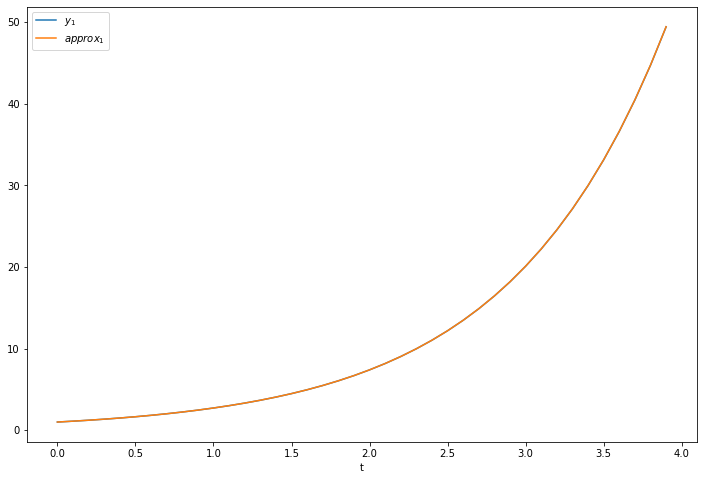

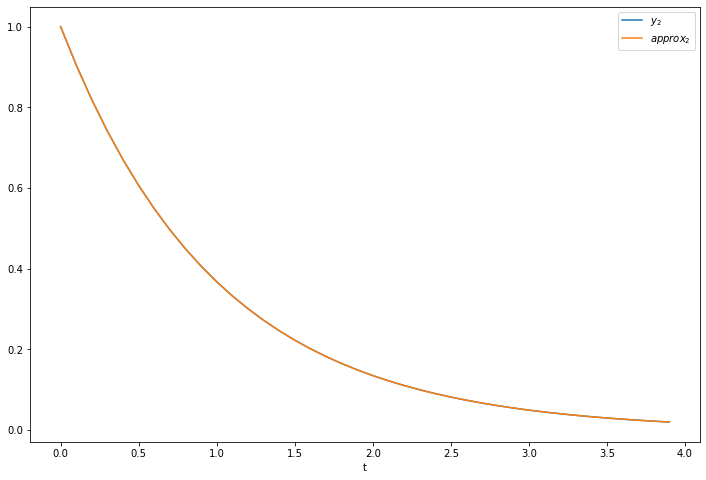

In [55]:
dataplot = data.drop(['h', f'$error_1$', f'$error_2$'],axis=1)

dataplot.plot(x='t',y=[f'$y_1$', f'$approx_1$'], figsize=(12,8)) 
dataplot.plot(x='t',y=[f'$y_2$', f'$approx_2$'], figsize=(12,8))

print(f"максимальная погрешность между u1 и y1 равна:{np.max(e1)}\n\
максимальная погрешность между u2 и y2 равна:{np.max(e2)}")

In [ ]:
H = np.linspace(0.001,0.1,1000) 
T = 4 
max_pogr_y1 = [] 
max_pogr_y2 = [] 
max_pogr_y1_h3 = [] 
max_pogr_y2_h3 = [] 
for h in H: 
    t = np.arange(0,T,h) 
    yn = np.array([1,1],float) 
    y1, y2 = original_y1(t), original_y2(t) 
    approx1, approx2 = solve(yn,t,h) 
    max_pogr_1 = np.max([np.abs(i-j) for i,j in zip(y1,approx1)]) 
    max_pogr_2 = np.max([np.abs(i-j) for i,j in zip(y2,approx2)]) 
    max_pogr_y1 = np.append(max_pogr_y1,max_pogr_1) 
    max_pogr_y2 = np.append(max_pogr_y2,max_pogr_2) 
     
    max_pogr_e1 = np.max([np.abs(i-j)/(h**3) for i,j in zip(y1,approx1)]) 
    max_pogr_e2 = np.max([np.abs(i-j)/(h**3) for i,j in zip(y2,approx2)]) 
    max_pogr_y1_h3.append(max_pogr_e1) 
    max_pogr_y2_h3.append(max_pogr_e2) 

In [ ]:
plt.plot(H, max_pogr_y1) 
plt.title(f'Зависимость max погр $y_1$ и RK3 от шага') 
plt.xlabel('Шаг', fontsize=14, color='black') 
plt.ylabel('Погрешность') 
plt.show()

In [ ]:
plt.plot(H, max_pogr_y2)  
plt.title(f'Зависимость max погр $y_2$ и RK3 от шага') 
plt.xlabel('Шаг', fontsize=14, color='black') 
plt.ylabel('Погрешность',) 
plt.show() 

In [ ]:
plt.plot(H, max_pogr_y1_h3) 
plt.title(f'Зависимость max погр $y_1$ и RK3 от $шага^3$') 
plt.xlabel('Шаг', fontsize=14, color='black') 
plt.ylabel('Погрешность',) 
plt.show() 

In [ ]:
plt.plot(H, max_pogr_y2_h3) 
plt.title(f'Зависимость max погр $y_2$ и RK3 от $шага^3$') 
plt.xlabel('Шаг', fontsize=14, color='black') 
plt.ylabel('Погрешность',) 
plt.show()

0.017638225995789014 : 3.201150323994817e-05


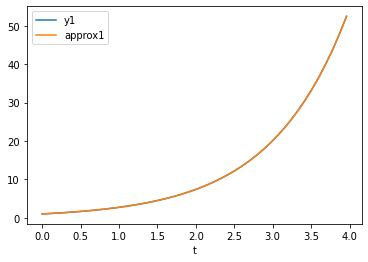

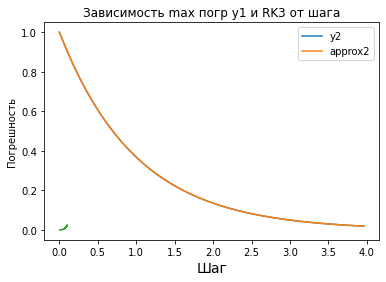

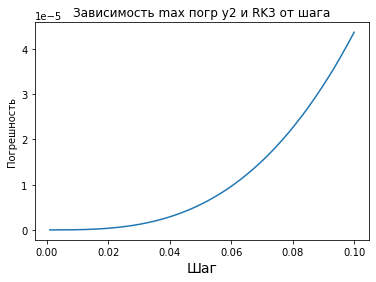

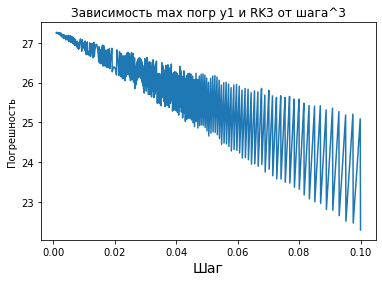

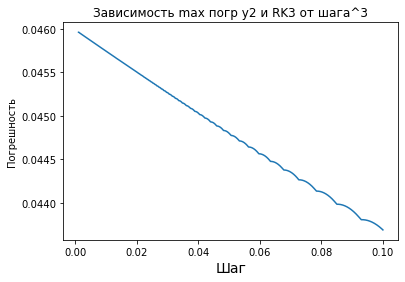

In [1]:
def f(t, yn):
    '''Основная функция с заданными параметрами '''
    mRocket = 30 #kг 
    mFuel = 15 #кг 
    T = 5 
    C = 0.2 
    p = 1.29 #кг/м^3 
    S = 0.25 #м^2 
    g = 9.81 
   
    h = 0.01 
    if (t>4): 
        T = 0 
        mFuel = 0 
         
    x,y,v,theta = yn[0],yn[1],yn[2],yn[3] 
    res = np.array([0, 0, 0, 0], float) 
    res[0] = v*np.cos(theta) 
    res[1] = v*np.sin(theta) 
    res[2] = (T-0.5*C*p*S*(v**2))/(mRocket) - ((mFuel/4)*v)/mRocket -np.sin(theta)*g 
    res[3] = -g*np.cos(theta)/v     
    return res 


In [ ]:
max_arr =[] 
def Simulator():
    '''Эксперимент с параметром theta'''
    V0 = 50 #м/сек
    
    theta = np.array([np.radians(30),np.radians(35),np.radians(40),np.radians(41),np.radians(42),
                      np.radians(43),np.radians(44),np.radians(45),np.radians(50),np.radians(55),
                      np.radians(60),np.radians(65),np.radians(70),np.radians(75),np.radians(80)])
    
    for i in theta: 
        t = np.arange(0,10,h) 
        yn = np.array([0,0,V0,i],float) 
        dx,dy,dv,dtheta =  [], [], [], [] 
         
        for j in t: 
            dx.append(yn[0])
            dy.append(yn[1]) 
            dv.append(yn[2]) 
            dtheta.append(yn[3]) 
            yn += rk3(f,yn,j,h) 
                  
        x, y = np.array([]), np.array([]) 
        for k in range(len(dx)): 
            if(dy[k] >= 0): 
                x = np.append(x, dx[k]) 
                y = np.append(y, dy[k]) 
        
        max_arr.append(max(x)) 
        plt.plot(x,y) 
        plt.title(f"График зависимости (x,y) при $\theta=${round(i,3)}") 
        plt.xlabel('x', fontsize=14, color='red') 
        plt.ylabel('y', fontsize=14, color='red') 
        plt.show()


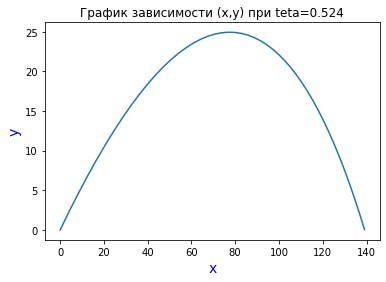

[139.0997533760959]


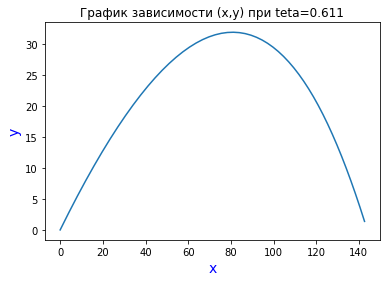

[139.0997533760959, 142.6386160118163]


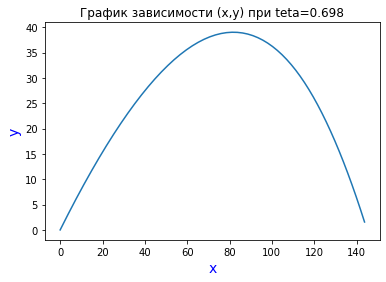

[139.0997533760959, 142.6386160118163, 143.7542790507206]


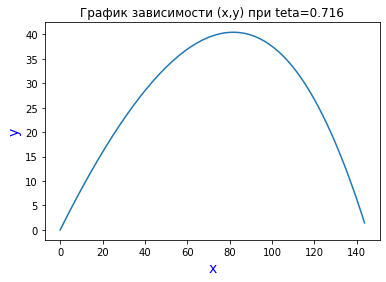

[139.0997533760959, 142.6386160118163, 143.7542790507206, 143.67281296908726]


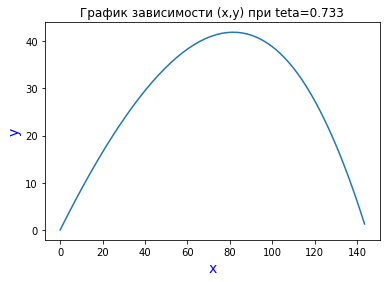

[139.0997533760959, 142.6386160118163, 143.7542790507206, 143.67281296908726, 143.48712321673437]


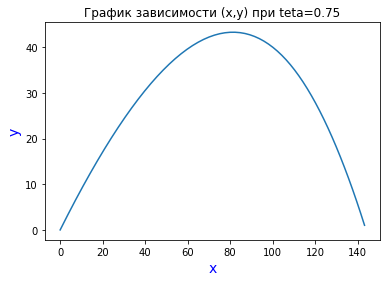

[139.0997533760959, 142.6386160118163, 143.7542790507206, 143.67281296908726, 143.48712321673437, 143.19612543168395]


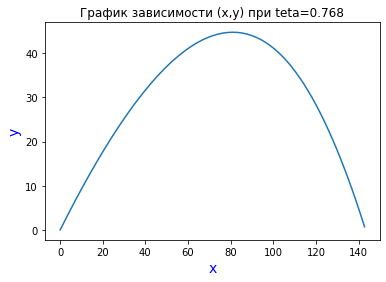

[139.0997533760959, 142.6386160118163, 143.7542790507206, 143.67281296908726, 143.48712321673437, 143.19612543168395, 142.79876993724923]


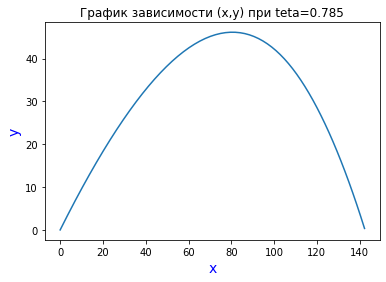

[139.0997533760959, 142.6386160118163, 143.7542790507206, 143.67281296908726, 143.48712321673437, 143.19612543168395, 142.79876993724923, 142.29404196550766]


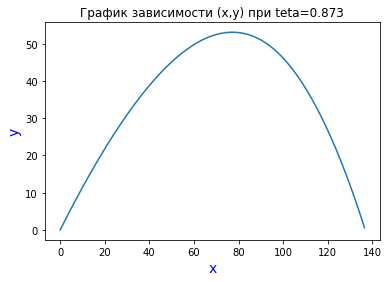

[139.0997533760959, 142.6386160118163, 143.7542790507206, 143.67281296908726, 143.48712321673437, 143.19612543168395, 142.79876993724923, 142.29404196550766, 136.48455797624956]


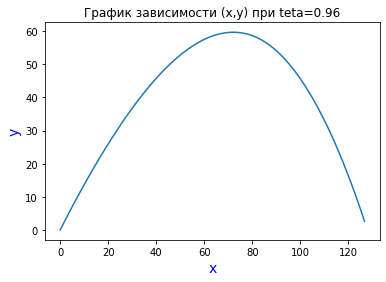

[139.0997533760959, 142.6386160118163, 143.7542790507206, 143.67281296908726, 143.48712321673437, 143.19612543168395, 142.79876993724923, 142.29404196550766, 136.48455797624956, 126.75737658444368]


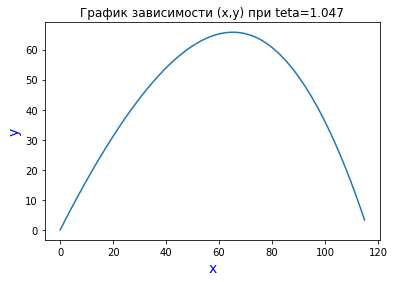

[139.0997533760959, 142.6386160118163, 143.7542790507206, 143.67281296908726, 143.48712321673437, 143.19612543168395, 142.79876993724923, 142.29404196550766, 136.48455797624956, 126.75737658444368, 114.89941258721369]


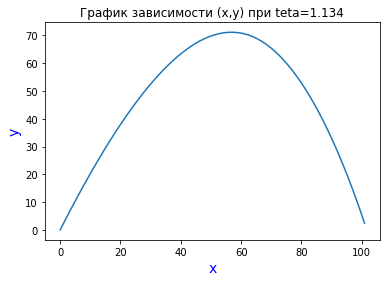

[139.0997533760959, 142.6386160118163, 143.7542790507206, 143.67281296908726, 143.48712321673437, 143.19612543168395, 142.79876993724923, 142.29404196550766, 136.48455797624956, 126.75737658444368, 114.89941258721369, 100.90494629049823]


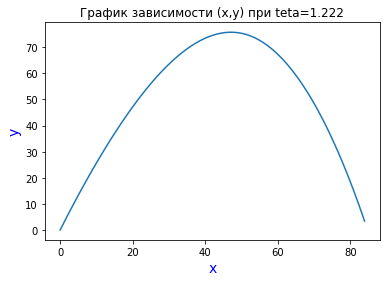

[139.0997533760959, 142.6386160118163, 143.7542790507206, 143.67281296908726, 143.48712321673437, 143.19612543168395, 142.79876993724923, 142.29404196550766, 136.48455797624956, 126.75737658444368, 114.89941258721369, 100.90494629049823, 83.90340635313655]


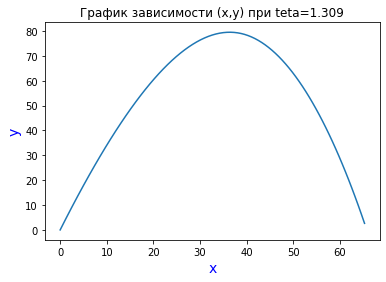

[139.0997533760959, 142.6386160118163, 143.7542790507206, 143.67281296908726, 143.48712321673437, 143.19612543168395, 142.79876993724923, 142.29404196550766, 136.48455797624956, 126.75737658444368, 114.89941258721369, 100.90494629049823, 83.90340635313655, 65.24308377667123]


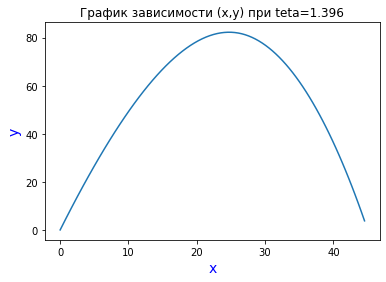

[139.0997533760959, 142.6386160118163, 143.7542790507206, 143.67281296908726, 143.48712321673437, 143.19612543168395, 142.79876993724923, 142.29404196550766, 136.48455797624956, 126.75737658444368, 114.89941258721369, 100.90494629049823, 83.90340635313655, 65.24308377667123, 44.550624505515394]


In [2]:
Simulator()

In [3]:
data

,h,t,y1,y2,approx1,approx2,error1,error2
0,0.09,0.00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
1,0.09,0.09,1.094174,0.913931,1.094183,0.913939,0.000009,0.000007
2,0.09,0.18,1.197217,0.835270,1.197237,0.835284,0.000020,0.000013
3,0.09,0.27,1.309964,0.763379,1.309997,0.763398,0.000033,0.000018
4,0.09,0.36,1.433329,0.697676,1.433377,0.697699,0.000048,0.000022
5,0.09,0.45,1.568312,0.637628,1.568378,0.637653,0.000065,0.000025
6,0.09,0.54,1.716007,0.582748,1.716092,0.582776,0.000086,0.000028
7,0.09,0.63,1.877611,0.532592,1.877720,0.532621,0.000109,0.000029
8,0.09,0.72,2.054433,0.486752,2.054569,0.486783,0.000136,0.000031
9,0.09,0.81,2.247908,0.444858,2.248075,0.444890,0.000167,0.000031
